Crear el conjunto de datos-Aumentar datos

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

Crear el data set generador

In [2]:
import os
datagen=ImageDataGenerator(
    rescale=1./255,  
    rotation_range=10,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=5,
    zoom_range=[0.7,1.3],
    validation_split=0.2,
)
# Set the directory for the datasets
dataset_directory = 'C:/Users/andre/OneDrive - Universidad Central del Ecuador/Code/Redes Neuronales/Ejercicio de red convolucional/dataset'

# Check if the directory exists
if not os.path.exists(dataset_directory):
    os.makedirs(dataset_directory)

# Update the filepaths in the code below
datagen_entrenamiento = datagen.flow_from_directory(os.path.join(dataset_directory),
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   shuffle=True,
                                                   subset="training")

datagen_pruebas = datagen.flow_from_directory(os.path.join(dataset_directory),
                                              target_size=(224, 224),
                                              batch_size=32,
                                              shuffle=True,
                                              subset="validation")


Found 48 images belonging to 3 classes.
Found 9 images belonging to 3 classes.


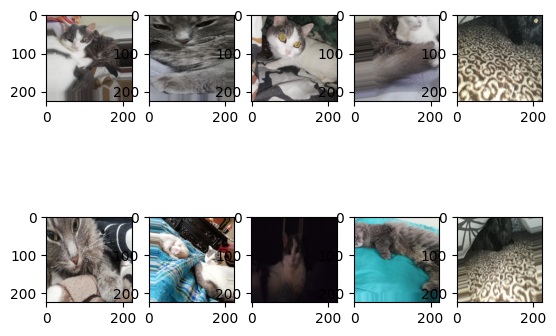

In [3]:
import matplotlib.pyplot as plt

for imagen, etiqueta in datagen_entrenamiento:
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(imagen[i])
    break
plt.show()

Cargando un modelo ya entrenado

In [4]:
import tensorflow as tf
import tensorflow_hub as hub
url="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenet_v2=hub.KerasLayer(url,input_shape=(224,224,3))

Congelar las capas: No entrenar más el modelo

In [5]:
mobilenet_v2.trainable=False

In [6]:
modelo=tf.keras.Sequential([
    mobilenet_v2,
    tf.keras.layers.Dense(2,activation="softmax")
])

In [7]:
modelo.compile(optimizer="adam",
               loss=tf.keras.losses.categorical_crossentropy,
               metrics=["accuracy"])

In [10]:
epocas=20
# Modify the number of classes in the output layer to match the number of classes in the labels
modelo=tf.keras.Sequential([
    mobilenet_v2,
    tf.keras.layers.Dense(3, activation="softmax")  # Change the number of units to 3
])
modelo.compile(optimizer="adam",
               loss=tf.keras.losses.categorical_crossentropy,
               metrics=["accuracy"])
entrenamiento=modelo.fit(datagen_entrenamiento,epochs=epocas,batch_size=32,validation_data=datagen_pruebas)

Epoch 1/20
2/2 [==============================] - 4s 2s/step - loss: 1.5670 - accuracy: 0.3125 - val_loss: 1.4661 - val_accuracy: 0.3333
Epoch 2/20
2/2 [==============================] - 3s 2s/step - loss: 1.2880 - accuracy: 0.4167 - val_loss: 1.4837 - val_accuracy: 0.0000e+00
Epoch 3/20
2/2 [==============================] - 3s 1s/step - loss: 1.1872 - accuracy: 0.5417 - val_loss: 1.0474 - val_accuracy: 0.5556
Epoch 4/20
2/2 [==============================] - 3s 1s/step - loss: 1.0305 - accuracy: 0.5000 - val_loss: 1.0216 - val_accuracy: 0.4444
Epoch 5/20
2/2 [==============================] - 3s 2s/step - loss: 0.7561 - accuracy: 0.6875 - val_loss: 0.7556 - val_accuracy: 0.6667
Epoch 6/20
2/2 [==============================] - 3s 1s/step - loss: 0.6955 - accuracy: 0.7292 - val_loss: 0.8915 - val_accuracy: 0.6667
Epoch 7/20
2/2 [==============================] - 3s 1s/step - loss: 0.5577 - accuracy: 0.8125 - val_loss: 0.7656 - val_accuracy: 0.5556
Epoch 8/20
2/2 [=====================

In [11]:
from PIL import Image
import cv2

def categoria(ruta):
    img = Image.open(ruta)
    img = img.convert('RGB')
    img = np.array(img).astype(float)/255
    img = cv2.resize(img,(224,224))
    prediccion = modelo.predict(img.reshape(-1,224,224,3))
    return np.argmax(prediccion[0], axis=-1)

In [20]:
ruta="C:\\Users\\andre\\OneDrive - Universidad Central del Ecuador\\Code\\Redes Neuronales\\Ejercicio de red convolucional\\negtro.jpeg"
prediccion=categoria(ruta)
if prediccion==0:
    print("Es vaquita")
elif prediccion==1:
    print("Es mimi")
else:
    print("Es negro")

1/1 [==============================] - 0s 29ms/step
Es negro


In [21]:
ruta="C:\\Users\\andre\\OneDrive - Universidad Central del Ecuador\\Code\\Redes Neuronales\\Ejercicio de red convolucional\\mimi.jpeg"
prediccion=categoria(ruta)
if prediccion==0:
    print("Es vaquita")
elif prediccion==1:
    print("Es mimi")
else:
    print("Es negro")

1/1 [==============================] - 0s 31ms/step
Es mimi


In [22]:
ruta="C:\\Users\\andre\\OneDrive - Universidad Central del Ecuador\\Code\\Redes Neuronales\\Ejercicio de red convolucional\\vaquita.jpeg"
prediccion=categoria(ruta)
if prediccion==0:
    print("Es vaquita")
elif prediccion==1:
    print("Es mimi")
else:
    print("Es negro")

1/1 [==============================] - 0s 30ms/step
Es vaquita
